In [34]:
import cv2
import os
import matplotlib.pyplot as plt
import time

import requests
from mpl_toolkits.axes_grid1 import ImageGrid

import urllib3
urllib3.disable_warnings()
import numpy as np
# 进度条库
from tqdm import tqdm
from PIL import Image


**主要流程**

1. 基于要识别的类别进行数据集采集
2. 划分数据集
3. 制作数据集标签
4. 加载分类器
5. 训练识别器得到训练文件
6. 读取训练文件，对输入的图片进行预测

#### 图像采集

In [3]:
cookies = {
'BDqhfp': '%E7%8B%97%E7%8B%97%26%26NaN-1undefined%26%2618880%26%2621',
'BIDUPSID': '06338E0BE23C6ADB52165ACEB972355B',
'PSTM': '1646905430',
'BAIDUID': '104BD58A7C408DABABCAC9E0A1B184B4:FG=1',
'BDORZ': 'B490B5EBF6F3CD402E515D22BCDA1598',
'H_PS_PSSID': '35836_35105_31254_36024_36005_34584_36142_36120_36032_35993_35984_35319_26350_35723_22160_36061',
'BDSFRCVID': '8--OJexroG0xMovDbuOS5T78igKKHJQTDYLtOwXPsp3LGJLVgaSTEG0PtjcEHMA-2ZlgogKK02OTH6KF_2uxOjjg8UtVJeC6EG0Ptf8g0M5',
'H_BDCLCKID_SF': 'tJPqoKtbtDI3fP36qR3KhPt8Kpby2D62aKDs2nopBhcqEIL4QTQM5p5yQ2c7LUvtynT2KJnz3Po8MUbSj4QoDjFjXJ7RJRJbK6vwKJ5s5h5nhMJSb67JDMP0-4F8exry523ioIovQpn0MhQ3DRoWXPIqbN7P-p5Z5mAqKl0MLPbtbb0xXj_0D6bBjHujtT_s2TTKLPK8fCnBDP59MDTjhPrMypomWMT-0bFH_-5L-l5js56SbU5hW5LSQxQ3QhLDQNn7_JjOX-0bVIj6Wl_-etP3yarQhxQxtNRdXInjtpvhHR38MpbobUPUDa59LUvEJgcdot5yBbc8eIna5hjkbfJBQttjQn3hfIkj0DKLtD8bMC-RDjt35n-Wqxobbtof-KOhLTrJaDkWsx7Oy4oTj6DD5lrG0P6RHmb8ht59JROPSU7mhqb_3MvB-fnEbf7r-2TP_R6GBPQtqMbIQft20-DIeMtjBMJaJRCqWR7jWhk2hl72ybCMQlRX5q79atTMfNTJ-qcH0KQpsIJM5-DWbT8EjHCet5DJJn4j_Dv5b-0aKRcY-tT5M-Lf5eT22-usy6Qd2hcH0KLKDh6gb4PhQKuZ5qutLTb4QTbqWKJcKfb1MRjvMPnF-tKZDb-JXtr92nuDal5TtUthSDnTDMRhXfIL04nyKMnitnr9-pnLJpQrh459XP68bTkA5bjZKxtq3mkjbPbDfn02eCKuj6tWj6j0DNRabK6aKC5bL6rJabC3b5CzXU6q2bDeQN3OW4Rq3Irt2M8aQI0WjJ3oyU7k0q0vWtvJWbbvLT7johRTWqR4enjb3MonDh83Mxb4BUrCHRrzWn3O5hvvhKoO3MA-yUKmDloOW-TB5bbPLUQF5l8-sq0x0bOte-bQXH_E5bj2qRCqVIKa3f',
'BDSFRCVID_BFESS': '8--OJexroG0xMovDbuOS5T78igKKHJQTDYLtOwXPsp3LGJLVgaSTEG0PtjcEHMA-2ZlgogKK02OTH6KF_2uxOjjg8UtVJeC6EG0Ptf8g0M5',
'H_BDCLCKID_SF_BFESS': 'tJPqoKtbtDI3fP36qR3KhPt8Kpby2D62aKDs2nopBhcqEIL4QTQM5p5yQ2c7LUvtynT2KJnz3Po8MUbSj4QoDjFjXJ7RJRJbK6vwKJ5s5h5nhMJSb67JDMP0-4F8exry523ioIovQpn0MhQ3DRoWXPIqbN7P-p5Z5mAqKl0MLPbtbb0xXj_0D6bBjHujtT_s2TTKLPK8fCnBDP59MDTjhPrMypomWMT-0bFH_-5L-l5js56SbU5hW5LSQxQ3QhLDQNn7_JjOX-0bVIj6Wl_-etP3yarQhxQxtNRdXInjtpvhHR38MpbobUPUDa59LUvEJgcdot5yBbc8eIna5hjkbfJBQttjQn3hfIkj0DKLtD8bMC-RDjt35n-Wqxobbtof-KOhLTrJaDkWsx7Oy4oTj6DD5lrG0P6RHmb8ht59JROPSU7mhqb_3MvB-fnEbf7r-2TP_R6GBPQtqMbIQft20-DIeMtjBMJaJRCqWR7jWhk2hl72ybCMQlRX5q79atTMfNTJ-qcH0KQpsIJM5-DWbT8EjHCet5DJJn4j_Dv5b-0aKRcY-tT5M-Lf5eT22-usy6Qd2hcH0KLKDh6gb4PhQKuZ5qutLTb4QTbqWKJcKfb1MRjvMPnF-tKZDb-JXtr92nuDal5TtUthSDnTDMRhXfIL04nyKMnitnr9-pnLJpQrh459XP68bTkA5bjZKxtq3mkjbPbDfn02eCKuj6tWj6j0DNRabK6aKC5bL6rJabC3b5CzXU6q2bDeQN3OW4Rq3Irt2M8aQI0WjJ3oyU7k0q0vWtvJWbbvLT7johRTWqR4enjb3MonDh83Mxb4BUrCHRrzWn3O5hvvhKoO3MA-yUKmDloOW-TB5bbPLUQF5l8-sq0x0bOte-bQXH_E5bj2qRCqVIKa3f',
'indexPageSugList': '%5B%22%E7%8B%97%E7%8B%97%22%5D',
'cleanHistoryStatus': '0',
'BAIDUID_BFESS': '104BD58A7C408DABABCAC9E0A1B184B4:FG=1',
'BDRCVFR[dG2JNJb_ajR]': 'mk3SLVN4HKm',
'BDRCVFR[-pGxjrCMryR]': 'mk3SLVN4HKm',
'ab_sr': '1.0.1_Y2YxZDkwMWZkMmY2MzA4MGU0OTNhMzVlNTcwMmM2MWE4YWU4OTc1ZjZmZDM2N2RjYmVkMzFiY2NjNWM4Nzk4NzBlZTliYWU0ZTAyODkzNDA3YzNiMTVjMTllMzQ0MGJlZjAwYzk5MDdjNWM0MzJmMDdhOWNhYTZhMjIwODc5MDMxN2QyMmE1YTFmN2QyY2M1M2VmZDkzMjMyOThiYmNhZA==',
'delPer': '0',
'PSINO': '2',
'BA_HECTOR': '8h24a024042g05alup1h3g0aq0q',
}

#  请求头
headers = {
'Connection': 'keep-alive',
'sec-ch-ua': '" Not;A Brand";v="99", "Google Chrome";v="97", "Chromium";v="97"',
'Accept': 'text/plain, */*; q=0.01',
'X-Requested-With': 'XMLHttpRequest',
'sec-ch-ua-mobile': '?0',
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36',
'sec-ch-ua-platform': '"macOS"',
'Sec-Fetch-Site': 'same-origin',
'Sec-Fetch-Mode': 'cors',
'Sec-Fetch-Dest': 'empty',
'Referer': 'https://image.baidu.com/search/index?tn=baiduimage&ipn=r&ct=201326592&cl=2&lm=-1&st=-1&fm=result&fr=&sf=1&fmq=1647837998851_R&pv=&ic=&nc=1&z=&hd=&latest=&copyright=&se=1&showtab=0&fb=0&width=&height=&face=0&istype=2&dyTabStr=MCwzLDIsNiwxLDUsNCw4LDcsOQ%3D%3D&ie=utf-8&sid=&word=%E7%8B%97%E7%8B%97',
'Accept-Language': 'zh-CN,zh;q=0.9',
}
def craw_single_class(keyword, DOWNLOAD_NUM = 200):
    if os.path.exists('dataset/'+keyword):
        print('文件夹 dataset/{} 已存在，之后直接将爬取到的图片保存至该文件夹中'.format(keyword))
    else:
        os.makedirs('dataset/{}'.format(keyword))
        print('新建文件夹：dataset/{}'.format(keyword))
    count = 1
    
    with tqdm(total=DOWNLOAD_NUM, position=0, leave=True) as pbar:
        
        # 爬取第几张
        num = 0
        # 是否继续爬取
        FLAG = True
        while FLAG:
            page = 30 * count
            params = (
                ('tn', 'resultjson_com'),
                ('logid', '12508239107856075440'),
                ('ipn', 'rj'),
                ('ct', '201326592'),
                ('is', ''),
                ('fp', 'result'),
                ('fr', ''),
                ('word', f'{keyword}'),
                ('queryWord', f'{keyword}'),
                ('cl', '2'),
                ('lm', '-1'),
                ('ie', 'utf-8'),
                ('oe', 'utf-8'),
                ('adpicid', ''),
                ('st', '-1'),
                ('z', ''),
                ('ic', ''),
                ('hd', ''),
                ('latest', ''),
                ('copyright', ''),
                ('s', ''),
                ('se', ''),
                ('tab', ''),
                ('width', ''),
                ('height', ''),
                ('face', '0'),
                ('istype', '2'),
                ('qc', ''),
                ('nc', '1'),
                ('expermode', ''),
                ('nojc', ''),
                ('isAsync', ''),
                ('pn', f'{page}'),
                ('rn', '30'),
                ('gsm', '1e'),
                ('1647838001666', ''),
            )

            response = requests.get('https://image.baidu.com/search/acjson', headers=headers, params=params, cookies=cookies)
            if response.status_code == 200:
                try:
                    json_data = response.json().get("data")

                    if json_data:
                        for x in json_data:
                            type = x.get("type")
                            if type not in ["gif"]:
                                img = x.get("thumbURL")
                                fromPageTitleEnc = x.get("fromPageTitleEnc")
                                try:
                                    resp = requests.get(url=img, verify=False)
                                    time.sleep(1)
                                    # print(f"链接 {img}")
                                    # 保存文件名
                                    # file_save_path = f'dataset/{keyword}/{num}-{fromPageTitleEnc}.{type}'
                                    file_save_path = f'dataset/{keyword}/{num}.{type}'
                                    with open(file_save_path, 'wb') as f:                                    
                                        f.write(resp.content)
                                        f.flush()
                                        # print('第 {} 张图像 {} 爬取完成'.format(num, fromPageTitleEnc))
                                        num += 1
                                        pbar.update(1) # 进度条更新

                                    # 爬取数量达到要求
                                    if num > DOWNLOAD_NUM:
                                        FLAG = False
                                        print('{} 张图像爬取完毕'.format(num))
                                        break

                                except Exception:
                                    pass
                except:
                    pass
            else:
                break

            count += 1
            
## 爬取多类
class_list = ['科比','哈登','杰伦布朗','安东尼戴维斯','威斯布鲁克']
for each in class_list:
    craw_single_class(each, DOWNLOAD_NUM = 50)

新建文件夹：dataset/科比


51it [01:01,  1.20s/it]                        


51 张图像爬取完毕
新建文件夹：dataset/哈登


51it [01:01,  1.21s/it]                        


51 张图像爬取完毕
新建文件夹：dataset/杰伦布朗


51it [01:06,  1.30s/it]                        


51 张图像爬取完毕
新建文件夹：dataset/安东尼戴维斯


51it [01:00,  1.18s/it]                        


51 张图像爬取完毕
新建文件夹：dataset/威斯布鲁克


51it [01:00,  1.19s/it]                        

51 张图像爬取完毕


In [27]:
def modify_file(root,src,dst,obj,retain=True):
    '''保留obj中结尾的文件'''
    path = [os.path.join(root,i)for i in [src,dst]]
    print(path[1])
    writeobj = []
    # 读取文件
    with open(path[0],'r') as f:
        readobj = f.readlines()
    # 每行数据
    for line in readobj:
        path_ =line.split(' ')[0]
        for num in obj:
            if path_.split('.')[0].endswith(str(num)):
                writeobj.append(line)
            else:
                continue
    if not retain: # 保留数据/反向删除
        writeobj=list(set(readobj)-set(writeobj))
                
    with open(path[1],'w+') as f:
        for line in writeobj:
                f.writelines(line)
            
    print('label has been modify success in {}'.format(path[1]))
                
obj = [i for i in range(40,51)] 
# 测试集 41~50
modify_file(root='/data0/yy_data/Project/dataset/test_data',src='label.txt',dst='label1.txt',obj=obj)
# 训练集 0~40
modify_file(root='/data0/yy_data/Project/dataset/train_data',src='label.txt',dst='label1.txt',obj=obj,retain=False)

/data0/yy_data/Project/dataset/test_data/label1.txt
label has been modify success in /data0/yy_data/Project/dataset/test_data/label1.txt
/data0/yy_data/Project/dataset/train_data/label1.txt
label has been modify success in /data0/yy_data/Project/dataset/train_data/label1.txt


In [29]:
modify_file(root='/data0/yy_data/Project/dataset/train_data',src='label1.txt',dst='label2.txt',obj='30',retain=False)

/data0/yy_data/Project/dataset/train_data/label2.txt
label has been modify success in /data0/yy_data/Project/dataset/train_data/label2.txt


In [78]:
def modify_img(root,obj):
    '''删除obj中结尾的图片'''
    for classes in os.listdir(root):
        if classes.endswith('.txt'):
            continue
        curr_pth = os.path.join(root,classes)
        for img in os.listdir(curr_pth):
            for num in obj:
                if img.split('.')[0].endswith(num):
                    os.remove(os.path.join(curr_pth,img))
            
obj = [str(i)for i in range(40,51)]
modify_img('/data0/yy_data/Project/dataset/train_data/','40') 

可视化数据集图像

<ipython-input-104-2ad5c210b50d>:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


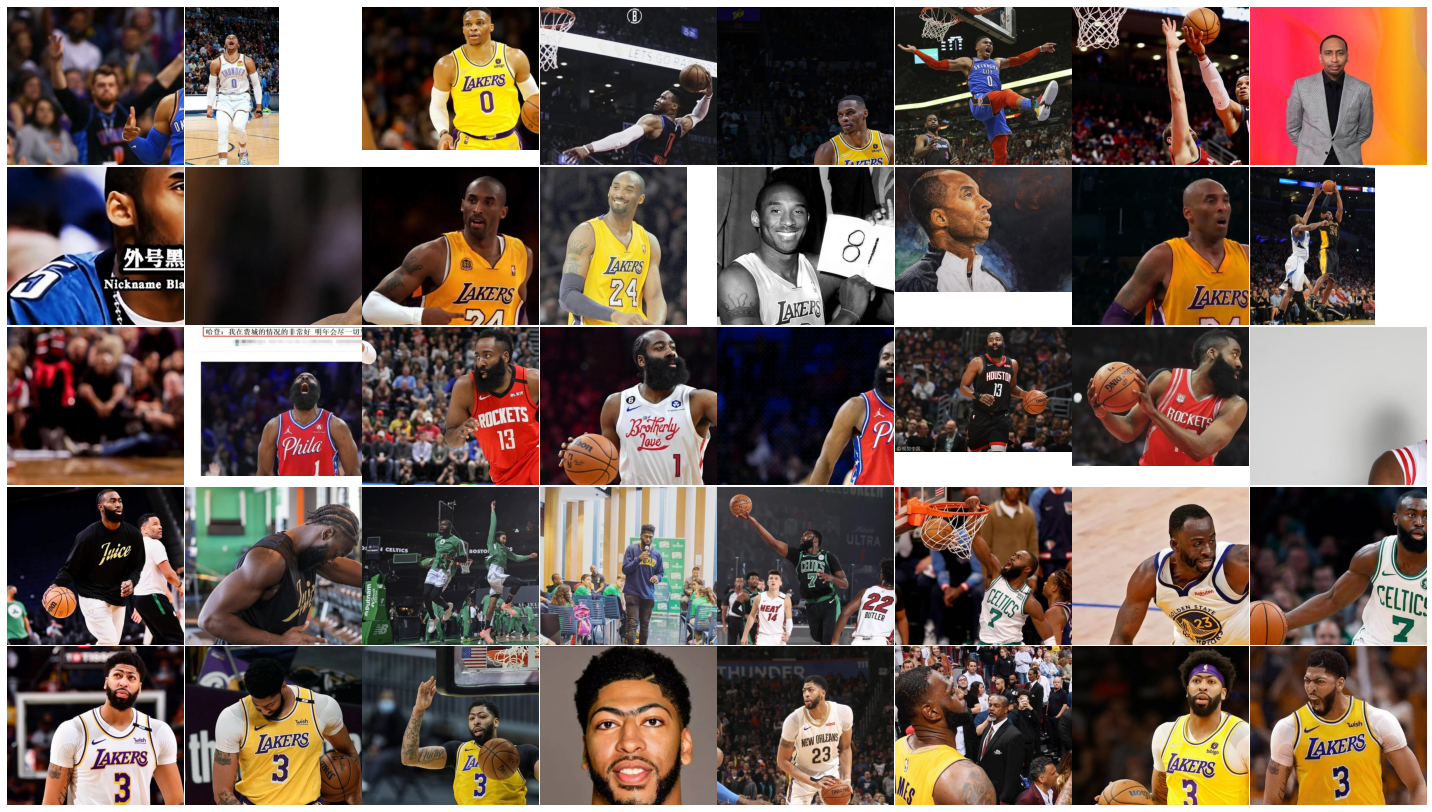

In [104]:
from mpl_toolkits.axes_grid1 import ImageGrid

with open('/data0/yy_data/Project/dataset/train_data/label1.txt') as f:
    path =f.read()
def read_img_N(path,num):
    # 类别下读取指定数量图片
    img_path =[]
    images = []
    classes_path = [os.path.join(path,i) for i in os.listdir(path)]
    for classes in classes_path:
        if classes.endswith('.txt'):
            continue
        # img_path.append(os.listdir(classes)[:num])
        classes_imgs = os.listdir(classes)[:num]
        classes_pathes =[os.path.join(classes,i) for i in classes_imgs]
        img_path.append(classes_pathes)
    for i in range(len(img_path)):
        for j in img_path[i]:
            img=cv2.imread(j)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            images.append(img)
    return images
# 获取到每个列各10个图像
images = read_img_N('/data0/yy_data/Project/dataset/train_data/',8)   
fig = plt.figure(figsize=(20,20))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(5, 8),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                )
# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()

#### 标签制作

In [36]:
# os.listdir('dataset/train_data/')
# os.chdir('dataset/train_data/')
os.getcwd()
paths = os.listdir(os.getcwd()) 
# 通过 迭代返回不同类别下的标签 读取文件夹下的文件名称

def img_rename(file):
    R'''根据类别将图片以 类别+num.jpg的形式更改名称'''
    # 更改工作路径,完成后要更改回去
    os.chdir(file)
    classes_name = file.split('/')[-1]
    img_name = os.listdir(file)
    # 迭代文件名称进行修改
    for i in img_name:
        os.rename(i,classes_name+i.split('.')[0]+'.jpg')
    print('{} img has been rename success!'.format(classes_name))


def write_label(file,path):
    '''读取数据集图片,根据类别打标签'''
    classes_path = [os.path.join(path,i) for i in os.listdir(path)]
    # 使用a的时候是添加数据不会覆盖
    with open(os.path.join(path,file),'w+') as f:
        # 文件类别
        for index,classes in enumerate(classes_path):
            #img_rename(classes)
            if( classes.endswith('.txt')):
                continue
            path = os.listdir(classes)
           
            img_path = [os.path.join(classes,i)for i in path] # 图像绝对路径
            for i in img_path:
                if i.endswith('.jpg'):
                    f.writelines(i+' '+str(index)+'\n')
                else:
                    continue
path = '/data0/yy_data/Project/dataset/train_data/'      
write_label(file='label.txt',path=path)

**数据集形式**
- train_dataset:
    0~39 共 40张照片
    - Davis
    - Wsetbrook
    - kobe
    - JaylenBrown
    - Harden

- test_dataset:
    41~50 共 10张照片
    - Davis
    - Wsetbrook
    - kobe
    - JaylenBrown
    - Harden


#### 人脸检测

单个图像的检测(基于Harr)

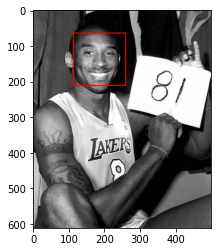

In [33]:
# 人脸检测
# 分类文件路径
# https://github.com/opencv/opencv/tree/master/data/haarcascades
import cv2
import matplotlib.pyplot as plt

def face_detect(img):
    r'''检测单个图片'''
    img = cv2.imread(img)
    origi_img = img.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    detect = cv2.CascadeClassifier('face_default.xml')
    face = detect.detectMultiScale(gray,1.1,5,cv2.CASCADE_SCALE_IMAGE,(100,100),(300,300))
    # face 返回多个图像框
    for x,y,w,h in face:
        cv2.rectangle(origi_img,(x,y),(x+w,y+h),color=(0,0,255),thickness=2)
    plt.imshow(origi_img[:,:,::-1])
face_detect('9.png')

单个图像检测(基于SSD)

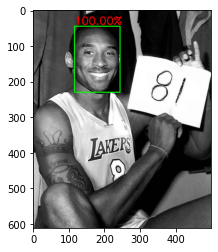

In [7]:
import cv2
import numpy as np

def detect_ssd(image_path,prototext_pth,model,conf):
    image = cv2.imread(image_path)
    # load cnn model
    model = cv2.dnn.readNetFromCaffe(prototext_pth, model)
    h,w = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),(104.0, 177.0, 123.0))
    model.setInput(blob)
    output = np.squeeze(model.forward())
    font_scale = 1.0
    for i in range(0, output.shape[0]):
        confidence = output[i, 2]
        if confidence > conf:
            box = output[i, 3:7] * np.array([w, h, w, h])
            start_x, start_y, end_x, end_y = box.astype(int)
            cv2.rectangle(image, (start_x, start_y), (end_x, end_y), color=(0, 255, 0), thickness=2)
            cv2.putText(image, f"{confidence*100:.2f}%", (start_x, start_y-5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), 2) 
    plt.imshow(image)
detect_ssd(image_path='9.png',prototext_pth='./prototxt.txt',model='./res10_300x300_ssd_iter_140000_fp16.caffemodel',conf=0.5)

调用视像头进行实时的人脸检测

In [ ]:
# 检测视频
cap = cv2.VideoCapture(0)
while True:
    flag,frame = cap.read()
    if not flag:
        break
    face_detect(frame)
    if ord('q') == cv2.waitKey(0):
        break
cv2.destroyAllWindows()
cap.release()

#### 预测

主要流程:
1. 加载训练数据
2. 通过选定的算法计算
3. 载入验证数据


**数据训练**

In [13]:
class_set ={}
for id,classes in enumerate(os.listdir('./train_data')):
    class_set[classes]=str(id)
def getImgAndLabel(path,class_set):
    faceSamples =[]
    ids=[]
    # 图片路径
    img_path=[]
    classes = [os.path.join(path,i) for i in os.listdir(path)]
    for class_ in classes:
        for img in os.listdir(class_):
            img_path.append(os.path.join(class_,img))
    # 加载分类器        
    detect = cv2.CascadeClassifier('./face_default.xml')
    # 遍历图片
    for imgpath in img_path:
        PIL_img = Image.open(imgpath).convert('L')
        img_numpy = np.array(PIL_img)
        faces = detect.detectMultiScale(img_numpy)
        # 获取类别
      
        id =int(class_set[imgpath.split('/')[-2]])
        for x,y,w,h in faces:
            ids.append(id)
            faceSamples.append(img_numpy[y:y+h,x:x+w])
    return faceSamples,ids
def train(train_path,class_set):
    print('loading traindata')
    facesSample,id =getImgAndLabel(train_path,class_set)
    # 加载识别器
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    # 训练
    print('start training')
    recognizer.train(facesSample,np.array(id))
    # 保存文件
    recognizer.write('trainer.yml')
    print('train file has saved in {}'.format('./trainer.yml'))
train('./train_data',class_set)

loading traindata
start training
train file has saved in ./trainer.yml


**预测数据**

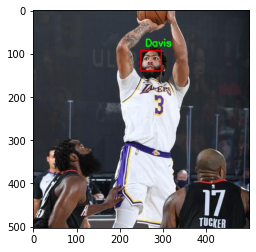

In [35]:
#### 预测数据
def predict_one_img(recognizer,img,confi,name):
    # 将置信度限定于 confi中
    img_ = img.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_detector = cv2.CascadeClassifier('./face_default.xml')
    face = face_detector.detectMultiScale(gray,1.2,5)
    for x,y,w,h in face:
        id,confidence = recognizer.predict(gray[y:y+h,x:x+h])
        # 画框
        cv2.rectangle(img_,(x,y),(x+w,y+h),color=(0,0,225),thickness=2) 
        if confidence < confi:
            cv2.putText(img_,name[id],(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.75,(0,255,0),2)
        else:
            cv2.putText(img_,'unknow',(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.75,(0,255,0),2)
    # 返回预测后的图像
    return img_[:,:,::-1]
name = [key for key,value in class_set.items()]
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('./trainer.yml')
img = cv2.imread('./train_data/Davis/Davis_12.jpg')
tep = predict_one_img(recognizer,img,120,name)
plt.imshow(tep)     

**预测训练集**

<ipython-input-37-5a59ba37cfa0>:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


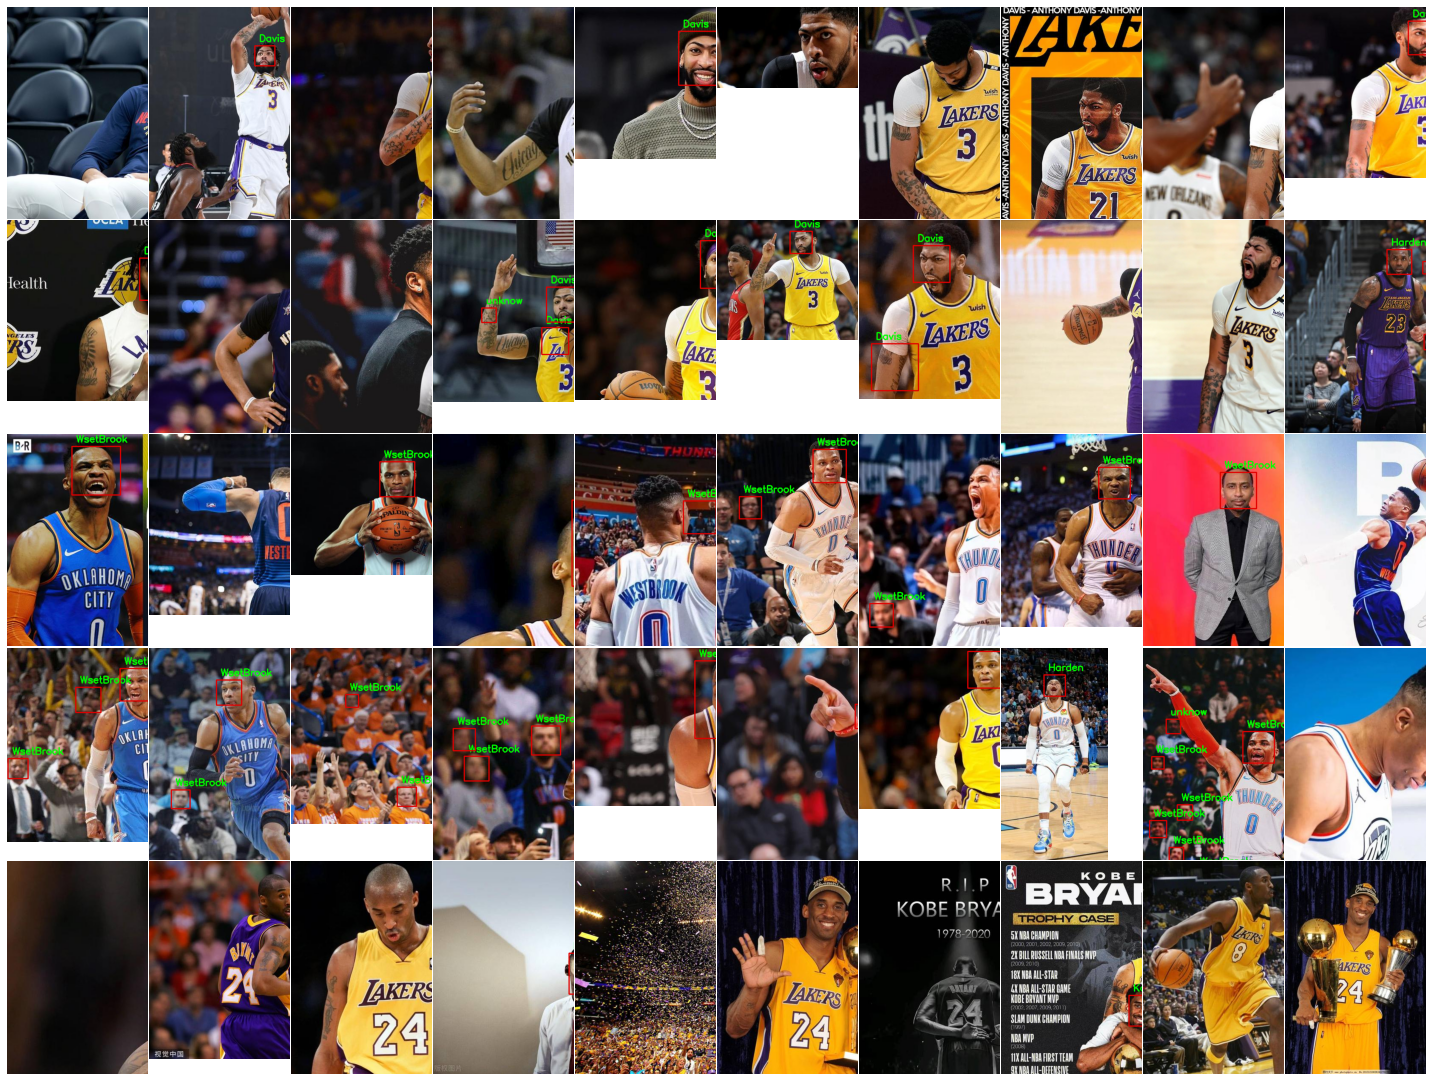

In [37]:
def predict(path,train_xml,class_set,confi):
    predict_result=[]
    # 加载训练数据文件
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read(train_xml)
    # 类别对应id
    name = [key for key,value in class_set.items()]
    # 图片路径
    img_path=[]
    # 类别文件路径
    classes = [os.path.join(path,i) for i in os.listdir(path)]
    for class_ in classes:
        for img in os.listdir(class_):
            temp_img = cv2.imread(os.path.join(class_,img))
            img_path.append(os.path.join(class_,img))
            # tep =predict_one_img(recognizer,temp_img,confi,name)
            predict_result.append(predict_one_img(recognizer,temp_img,confi,name))
    return predict_result

prict_ret = predict('./train_data','./trainer.yml',class_set,confi=150)  
fig = plt.figure(figsize=(20,20))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(5, 10),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                )
# 遍历每张图像
for ax, im in zip(grid, prict_ret):
    ax.imshow(im)
    ax.axis('off')
plt.tight_layout()
plt.show()

**预测训练集**

<ipython-input-36-e390fca3b55e>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


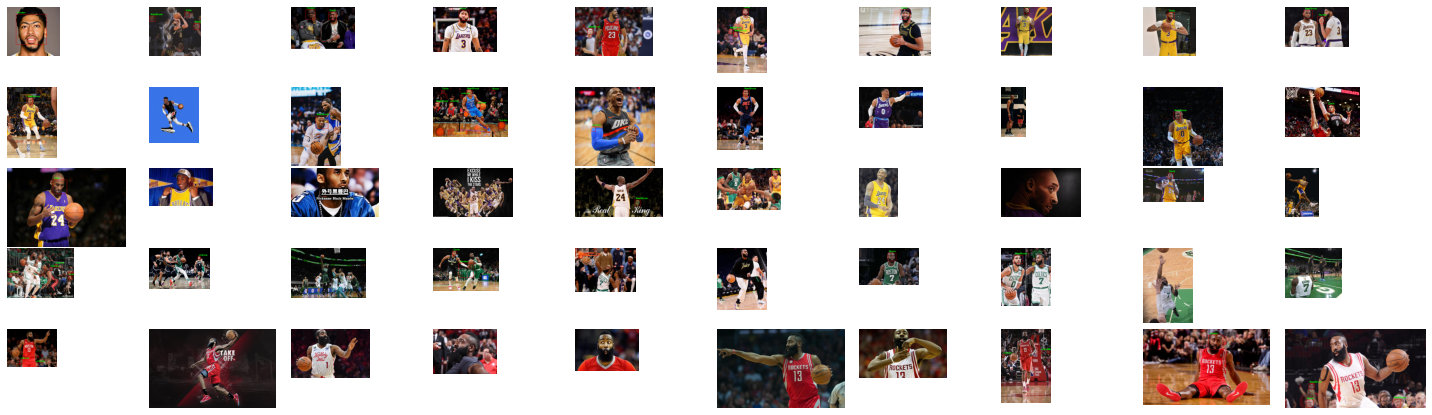

In [36]:
prict_ret = predict('./test_data','./trainer.yml',class_set,confi=150)  
fig = plt.figure(figsize=(20,20))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(5, 10),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                )
# 遍历每张图像
for ax, im in zip(grid, prict_ret):
    ax.imshow(im)
    ax.axis('off')
plt.tight_layout()
plt.show()